In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from hurst import compute_Hc

In [2]:
from os import listdir
files = listdir('data')

In [3]:
variableBorrowRates = dict()

for file_name in files:
    f = pd.read_csv('data/'+file_name)
    _id = (f.variableBorrowRate_avg == 0) 
    
    f = f.loc[~_id]
    
    f = f.loc[~f.x.isna()]

    rate = pd.Series(list(f.variableBorrowRate_avg), index = pd.to_datetime(f.x))

    variableBorrowRates[file_name[:4]] = rate

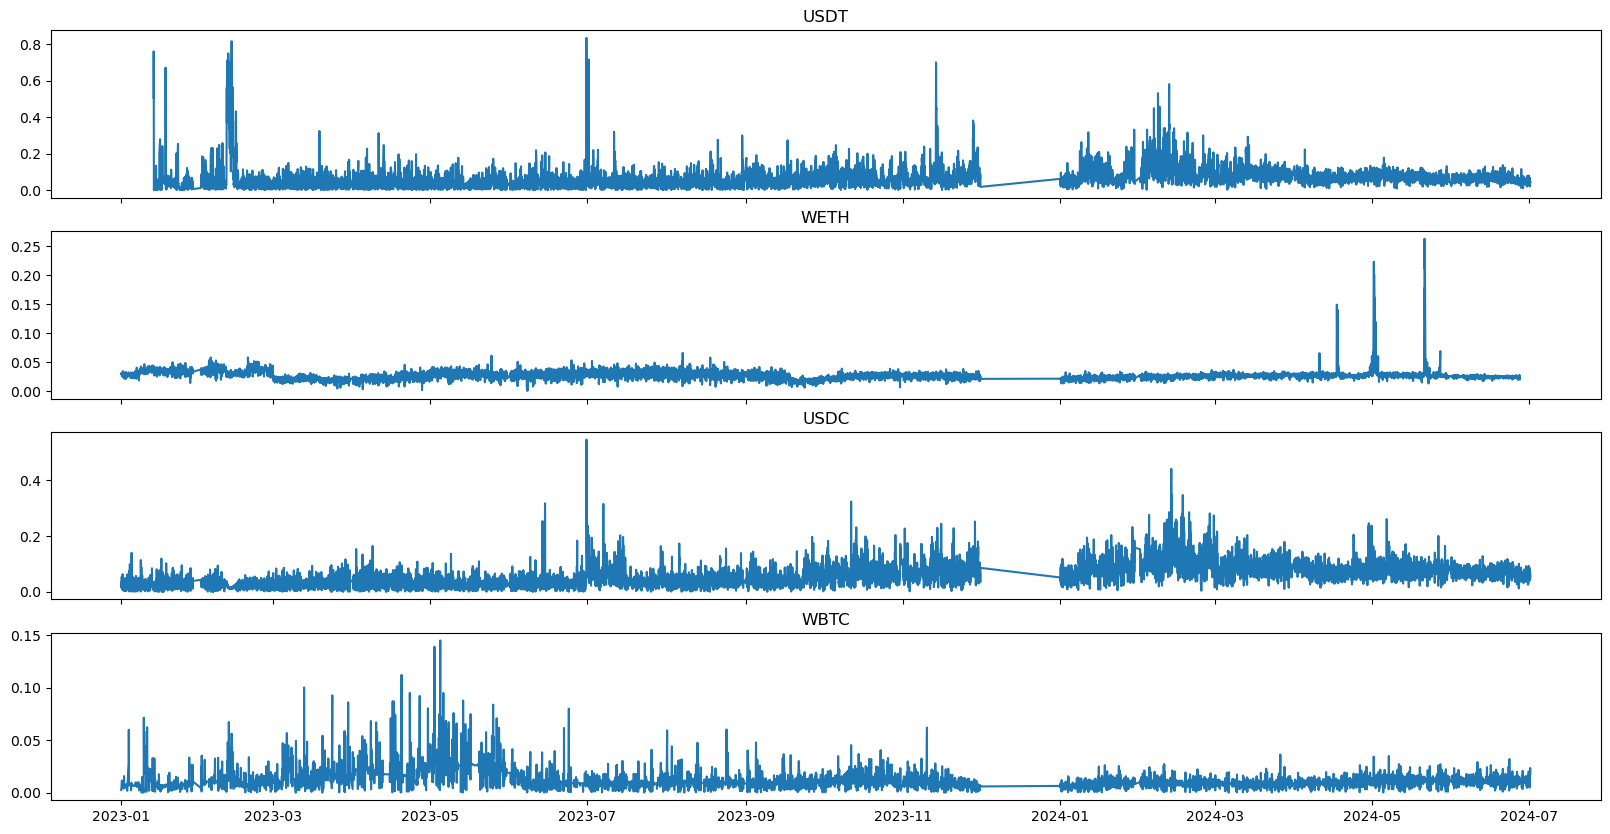

In [610]:
f, ax = plt.subplots(len(variableBorrowRates), figsize=(20,10), sharex=True, sharey=False)
for i, coin in enumerate(variableBorrowRates):
    data = variableBorrowRates[coin]
    _id = data.index > '2023-01-01'
    data = data.loc[_id]
    ax[i].plot(data.index, data)
    ax[i].set_title(coin)


plt.savefig('aaa.pdf', transparent=True)

USDT: H=0.6782, c=0.4074
WETH: H=0.6488, c=0.3737
USDC: H=0.6391, c=0.4714
WBTC: H=0.5711, c=0.6774


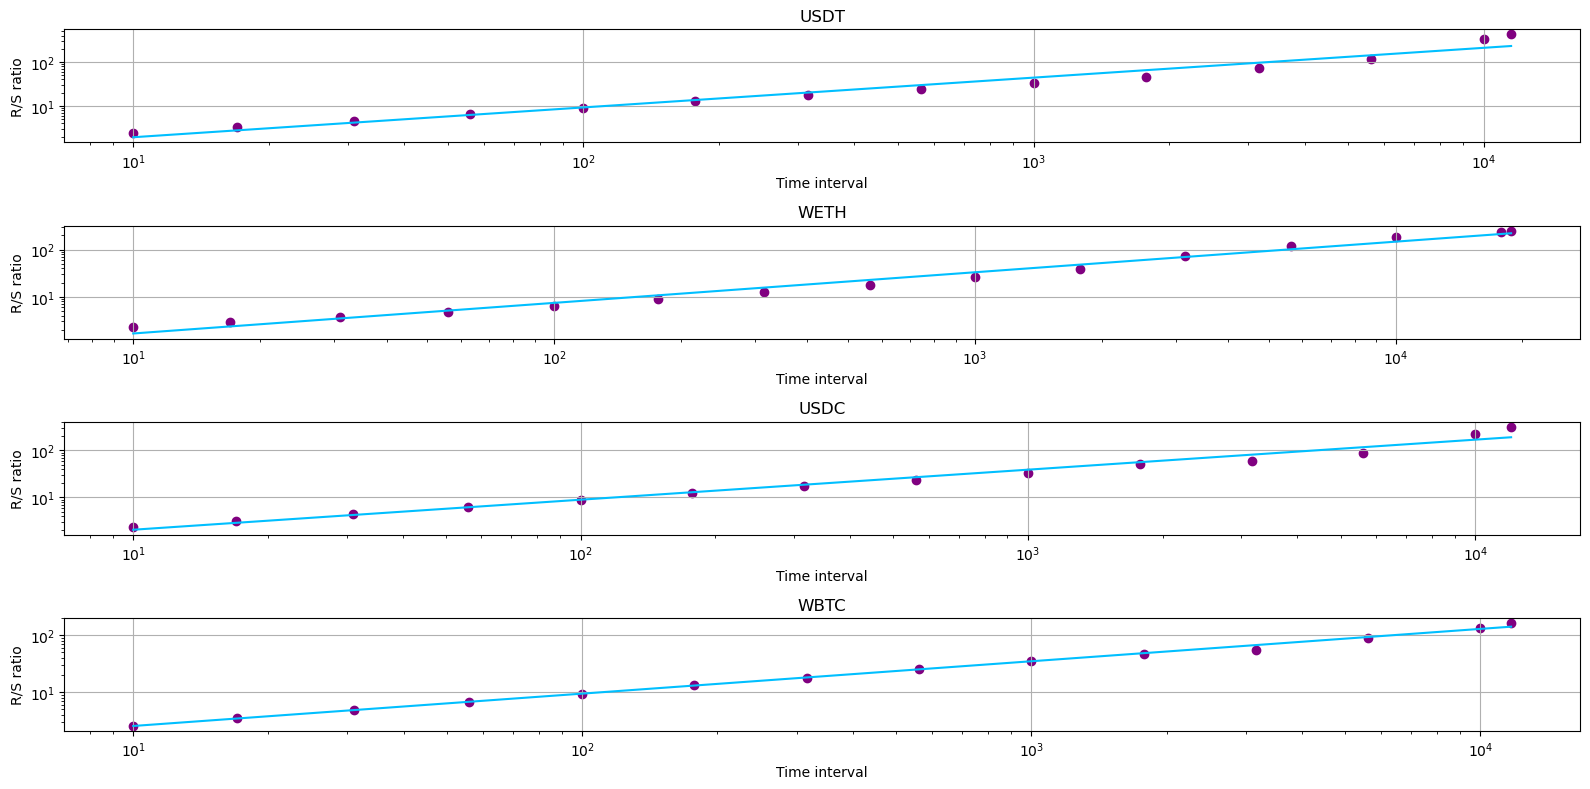

In [618]:
H_results = dict()
f, ax = plt.subplots(len(variableBorrowRates), figsize=(16,8))

for i, coin in enumerate(variableBorrowRates):
    H, c, data = compute_Hc(variableBorrowRates[coin],
                            kind='price', simplified=False)
    
    ax[i].plot(data[0], c*data[0]**H, color="deepskyblue")
    ax[i].scatter(data[0], data[1], color="purple")
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Time interval')
    ax[i].set_ylabel('R/S ratio')
    ax[i].grid(True)
    ax[i].set_title(coin)
    print(coin+": H={:.4f}, c={:.4f}".format(H,c))
    
    H_results[coin] = (H, c)

plt.tight_layout()

x
2023-01-01 00:00:00    0.006082
2023-01-01 01:00:00    0.002534
2023-01-01 05:00:00    0.006706
2023-01-01 06:00:00    0.011496
2023-01-01 07:00:00    0.011496
                         ...   
2024-07-01 10:00:00    0.012459
2024-07-01 11:00:00    0.011618
2024-07-01 12:00:00    0.010650
2024-07-01 14:00:00    0.023517
2024-07-01 15:00:00    0.017824
Length: 11704, dtype: float64

In [587]:
H_results = pd.DataFrame(H_results).T
H_results.columns = ['H', 'c']
H_results

,H,c
USDT,0.678185,0.407436
WETH,0.648850,0.373672
USDC,0.639089,0.471380
WBTC,0.571113,0.677434


In [127]:
def twoSum(nums, target):
    for i, n in enumerate(nums):
        try:
            j = nums.index(target - n)
            if i !=j:
                print(j)
                return [i, j]
        except:
            pass

In [140]:
x = 1234
S = list(str(x))

for i, s in enumerate(S[:int(len(S)/2)]):
    if S[i] == S[len(S)-i-1]:
        continue
    else:
        print('a')
        
        

a
a


In [139]:
S[len(S)-i]

IndexError: list index out of range

In [150]:
data = [[1, 'a@b.com'], [2, 'c@d.com'], [3, 'a@b.com']]
person = pd.DataFrame(data, columns=['id', 'email']).astype({'id':'Int64', 'email':'object'})



df = pd.pivot_table(person, index='email', aggfunc='count')
pd.DataFrame(df.loc[df.id > 1].index)

,email
0,a@b.com


In [189]:
data = [[1, 'Joe', 70000, 3], [2, 'Henry', 80000, 4], [3, 'Sam', 60000, None], [4, 'Max', 90000, None]]
employee = pd.DataFrame(data, columns=['id', 'name', 'salary', 'managerId']).astype({'id':'Int64', 'name':'object', 'salary':'Int64', 'managerId':'Int64'})


result = employee.merge(employee, how = 'left', left_on = 'managerId', right_on = 'id')
result.loc[result.salary_x > result.salary_y].loc[:, 'name_x']


In [196]:
a = [0,0,0,1]

a.remove(0)
a

[0, 0, 1]

In [232]:
grid = [[1,3,1],
        [1,5,1],
        [4,2,1]]

m = len(grid)
n = len(grid[0])
dp = [[0]*n for _ in range(m)]


dp[0][0] = grid[0][0]

for i in range(1, m):
    dp[i][0] = dp[i-1][0] + grid[i][0]

for j in range(1, n):
    dp[0][j] = dp[0][j-1] + grid[0][j]

for i in range(1, m):
    for j in range(1, n):
        dp[i][j] = grid[i][j] + min([dp[i-1][j], dp[i][j-1]])

dp


[[1, 4, 5], [2, 7, 6], [6, 8, 7]]

In [264]:
obstacleGrid = [[0,0],[1,1],[0,0]]

m = len(obstacleGrid)
n = len(obstacleGrid[0])
dp = [[0 for _ in range(n)] for _ in range(m)]

if obstacleGrid[0][0] == 0:
    dp[0][0] = 1
else:
    0

for i in range(1, m):
    if obstacleGrid[i][0] == 0:
        dp[i][0] = dp[i-1][0]
for j in range(1, n):
    if obstacleGrid[0][j] == 0:
        dp[0][j] = dp[0][j-1]

# for i in range(1, m):
#     for j in range(1, n):
#         if obstacleGrid[i][j] == 0:
#             dp[i][j] = dp[i-1][j] + dp[i][j-1]
dp

[[1, 1], [0, 0], [0, 0]]

In [326]:
matrix = [[100,-42,-46,-41],
          [31,97,10,-10],
          [-58,-51,82,89],
          [51,81,69,-51]]

m = len(matrix)
n = len(matrix[0])
dp = [[0 for _ in range(m)] for _ in range(n)]

for j in range(n):
    dp[0][j] = matrix[0][j]

for i in range(1, m):
    for j in range(n):
        s = max([j-1,  0])
        e = min([j+1, n-1])
        dp[i][j] = matrix[i][j] + min(dp[i-1][s:e+1])

dp

[[100, -42, -46, -41],
 [-11, 51, -36, -56],
 [-69, -87, 26, 33],
 [-36, -6, -18, -25]]

In [331]:
82-56

26

In [334]:
q = [1,3,2,4,5]
oq = list(range(1, len(q)+1))
oq

[1, 2, 3, 4, 5]

In [339]:
a = 'abc'

b = a[:].upper()
print(a, b)

abc ABC


In [341]:
a[1].upper()


'B'

In [348]:
a = [1,3,1,1]

a.remove(1)
a.remove(1)

a

[3, 1]

In [355]:
n = 13
binary = bin(n)[2:]

b = binary.zfill(32)



'00000000000000000000000000001101'

In [346]:
lambda_1 = 1
lambda_2 = 1
gamma = 2
x = 2
r1 = 0.1
r2 = 0.1
mu = 0.2
sigma = 0.3

# Define the function to find the root of

p_star = 0.5
lhs = lambda_1 * np.exp(gamma * p_star * x) - lambda_2 * np.exp(-gamma * x * (p_star - 1))
rhs = (r1 - r2 - mu) + (1 - p_star) * x * sigma**2 * gamma


print(lhs, rhs)
lambda_1 * np.exp(gamma * p_star * x)

0.0 -0.020000000000000018


7.38905609893065

In [347]:
lambda_2 * np.exp(-gamma * x * (p_star - 1))

7.38905609893065

In [348]:
import numpy as np
from scipy.optimize import fsolve, fmin, root_scalar, minimize

# Parameters (replace these with your actual values)
lambda_1 = 1
lambda_2 = 1
gamma = 2
x = 200
r1 = 0.1
r2 = 0.1
mu = 0.0
sigma = 0.3

# Define the function to find the root of
def f(p_star):
    lhs = lambda_1 * np.exp(gamma * p_star * x) - lambda_2 * np.exp(-gamma * x * (p_star - 1))
    rhs = (r1 - r2 - mu) + (1 - p_star) * x * sigma**2 * gamma
    return (lhs - rhs)

bracket = [-1, 1]

# p_arr = np.linspace(bracket[0],bracket[1],100)
# plt.plot(p_arr, f(p_arr))

initial_guess = 0

res = root_scalar(f, bracket=bracket, method='brentq')
p_star_solution = res.root
# plt.scatter(p_star_solution, f(p_star_solution))

print(p_star_solution)

0.4999999999999941


/var/folders/cx/r29qtv6d47gc4c3vgvtvlgth0000gn/T/ipykernel_41554/1818582282.py:16: RuntimeWarning: overflow encountered in exp
  lhs = lambda_1 * np.exp(gamma * p_star * x) - lambda_2 * np.exp(-gamma * x * (p_star - 1))


In [356]:
p_star= 0.4
gamma = 0.25
x = 10
lambda_1 * np.exp(-gamma *x * p_star) * (1-np.exp(gamma *x))

-4.113809629166623

/var/folders/cx/r29qtv6d47gc4c3vgvtvlgth0000gn/T/ipykernel_41554/2632160478.py:15: RuntimeWarning: invalid value encountered in power
  part4 = lambda_2*(p**gamma-1)


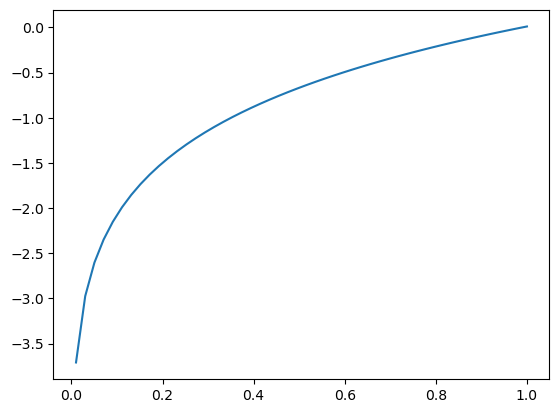

In [370]:

# Parameters (replace these with your actual values)
lambda_1 = 0.0  # Example value for lambda^{(1)}
lambda_2 = 10.0  # Example value for lambda^{(2)}
gamma = 0.1    # Example value for gamma      
r1 = 0.1        # Example value for r_1
r2 = 0.0       # Example value for r_2
mu = 0.1 # Example value for mu
sigma = 0.9    # Example value for sigma


def H(p):
    part1 = (p*(r1-r2-mu)+r2+mu) * gamma
    part2 = 0.5*(1-p)**2*sigma**2*(gamma**2-gamma)
    part3 = lambda_1*((1-p)**gamma-1)
    part4 = lambda_2*(p**gamma-1)
    
    return part1 + part2 + part3 + part4

plt.plot(p_arr, H(p_arr))


In [580]:
lambda_1 = 3   # Example value for lambda^{(1)}
lambda_2 = 1    # Example value for lambda^{(2)}
gamma = 0.5     # Example value for gamma      
r1 = 0.1*lambda_1        # Example value for r_1
r2 = 0.1*lambda_2        # Example value for r_2
mu = 0.1         # Example value for mu
sigma = 0.5       # Example value for sigma

def FOC(p):
    lhs = lambda_1*(1-p)**(gamma-1) - lambda_2*p**(gamma-1)
    rhs = (r1-r2-mu) - (1-p)*sigma**2 *(gamma-1)
    return lhs - rhs

# plt.plot(p_arr, FOC(p_arr))
bracket = [0.001, .999]
res = root_scalar(FOC, bracket=bracket, method='brentq')
res.root

0.11302180261547998

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -12.000000000000004
        x: [ 0.000e+00]
      nit: 1
      jac: [ 3.300e+01]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

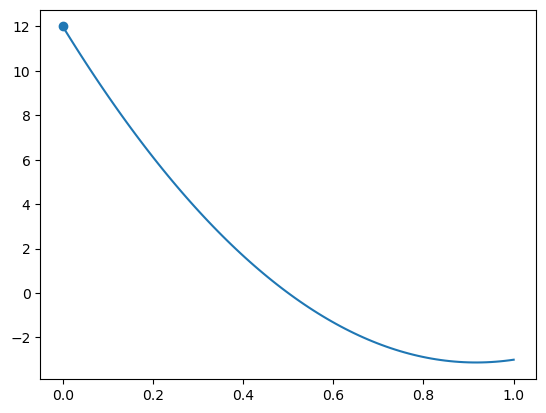

In [302]:
lambda_1 = 0
lambda_2 = 0
gamma = 3
x = 10
r1 = 0.1
r2 = 0
mu = 0.2
sigma = 0.2

def H(p):
    part1 = x*(p*(r1-r2-mu)+r2+mu)*(-gamma)
    part2 = 0.5*(1-p)**2 * x**2 *sigma**2 * gamma**2 
    part3 = lambda_1 *(np.exp(gamma*p*x)-1)
    part4 = lambda_2 *(np.exp(-gamma*(p-1)*x)-1)

    return part1 + part2 + part3 + part4

def loss(p):
    return -H(p)


p1, p2 = 0, 1
p_arr = np.linspace(p1,p2,100)

res = minimize(loss, 0.5, bounds=[(p1,p2)])

plt.plot(p_arr, H(p_arr))
plt.scatter(res.x, H(res.x))

res

In [526]:
gamma = 0.1
p = 0.000001
p**gamma/p

251188.64315095803

In [79]:
p_star_solution[0]

0.5000027770996097

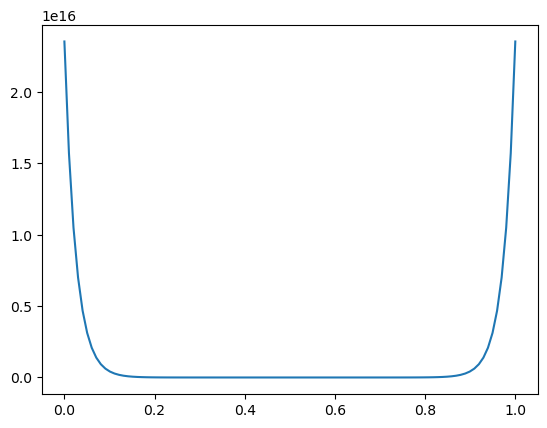

In [68]:
import matplotlib.pyplot as plt 


